## Подключение бибилиотек

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import GridSearchCV

## Погружаю датасет с тренировочными данными

In [2]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Подготовка данных

## Замена NaN

В данном датасете NaN чаще всего обозначает не пропущенные данные, а отсутствие объекта, например, нет бассейна, облицовки и т.д.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

В зависимости от данных заменяю NaN средним значением или меткой No_. Для этого сначала создаю словарь значений,
затем по циклу заменяю NaN

In [5]:
col_with_nans = {'LotFrontage': df['LotFrontage'].mean(),
                 'Alley': 'NotAccess', 'MasVnrType': 'None_veneer', 'MasVnrArea': 0,
                 'BsmtQual': 'No_Basement', 'BsmtCond': 'No_Basement', 'BsmtExposure': 'No_Basement',
                 'BsmtFinType1': 'No_Basement', 'BsmtFinType2': 'No_Basement', 'Electrical': 'No_Electricity',
                 'FireplaceQu': 'No_Fireplace', 'GarageType': 'No_Garage',
                 'GarageFinish': 'No_Garage', 'GarageQual': 'No_Garage', 'GarageCond': 'No_Garage',
                 'GarageYrBlt': 0, 'PoolQC': 'No_Pool', 'Fence': 'No_Fence', 'MiscFeature': 'No_MiscFeature'}

In [6]:
def remove_nan(df_with_nan):
    nans = df_with_nan.loc[:, df_with_nan.isnull().any()].copy()
    for col_key, col_val in col_with_nans.items():
        nans[col_key].fillna(col_val, inplace=True)
    return nans

Теперь перезаписываю полученные значения в df

In [7]:
df[list(col_with_nans)] = remove_nan(df)

## Получаю список колонок, разбитых в словарь по типам

In [8]:
list_colums_with_str = df.columns.to_series().groupby(df.dtypes).groups
list_colums_with_str = {k.name: v for k, v in list_colums_with_str.items()}
list_colums_with_str

{'int64': Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 'float64': Index(['LotFrontage', 'MasVnrArea', 'GarageFinish'], dtype='object'),
 'object': Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'Bs

## Разбиваю столбцы со значениями типа string с помощью get_dummies

In [80]:
df_ext = pd.concat(
    [df.drop(list_colums_with_str['object'], axis=1),
     pd.get_dummies(df[list_colums_with_str['object']], prefix=list_colums_with_str['object'])],
    axis=1)


In [81]:
df_ext.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=306)

### Удаляю столбцы, в которых были одинаковые текстовые значения, например, No_Basement

In [82]:
col_equal = [ 'BsmtExposure_No_Basement',
                 'BsmtFinType1_No_Basement', 'BsmtFinType2_No_Basement', 'GarageType_No_Garage',
                 'GarageQual_No_Garage', 'GarageCond_No_Garage']

In [83]:
for col in col_equal:
    df_ext.drop(col, inplace=True, axis = 1)

In [13]:
df_ext

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


## Разделяю признаки на категории, чтобы посмотреть, что из них и как влияет на стоимость

In [84]:
y_target = df_ext['SalePrice'] # отделяю целевую переменную

In [85]:
classification = {
    'house_location': ['Street', 'Alley', 'LotConfig',
                       'LandSlope',
                       'Neighborhood',
                       'PavedDrive'],
    'home_property': ['MSSubClass',
                      'MSZoning', 'LotFrontage',
                      'LotArea', 'LotShape', 'LandContour',
                      'Utilities', 'Condition1', 'Condition2',
                      'HouseStyle', 'OverallQual',
                      'OverallCond', 'ExterQual',
                      'ExterCond', 'BsmtHalfBath', 'FullBath',
                      'HalfBath', 'Kitchen', 'KitchenQual', 'Functional'],
    'house_type': ['RoofStyle', 'RoofMatl', 'BldgType',
                   'YearBuilt', 'YearRemodAdd', 'Exterior1st',
                   'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation',
                   '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea'],
    'additional_extensions': ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                              'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
                              'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'Fireplaces',
                              'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
                              'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                              'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
    'home_communications': ['Heating', 'HeatingQC',
                            'CentralAir', 'Electrical'],
    'realtor_data': ['MoSold', 'YrSold',
                     'SaleType', 'SaleCondition']
}

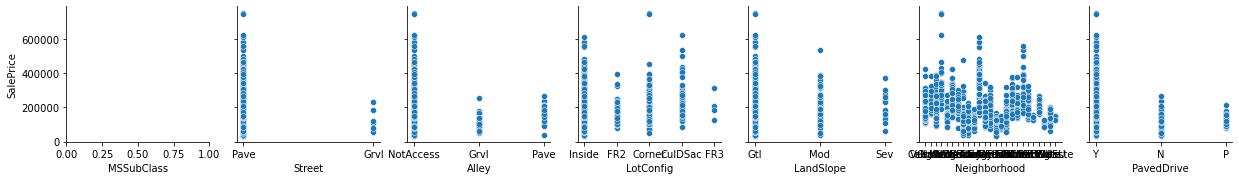

In [86]:
data_house_location = df[['MSSubClass','Street', 'Alley', 'LotConfig',
                       'LandSlope',
                       'Neighborhood',
                       'PavedDrive','SalePrice']]
sns.pairplot( data_house_location, y_vars=['SalePrice'], x_vars=data_house_location.columns.drop("SalePrice"),  )

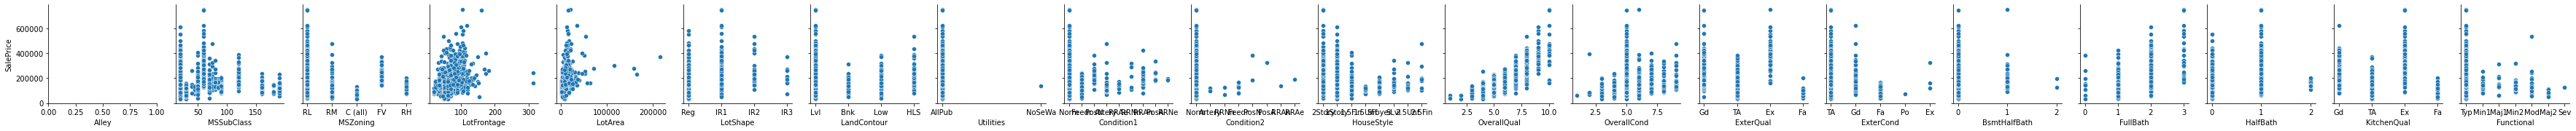

In [17]:
data_home_property = df[['Alley','MSSubClass',
                      'MSZoning', 'LotFrontage',
                      'LotArea', 'LotShape', 'LandContour',
                      'Utilities', 'Condition1', 'Condition2',
                      'HouseStyle', 'OverallQual',
                      'OverallCond', 'ExterQual',
                      'ExterCond', 'BsmtHalfBath', 'FullBath',
                      'HalfBath', 'KitchenQual', 'Functional',
                    'SalePrice']]
sns.pairplot(data_home_property, y_vars=['SalePrice'], x_vars=data_home_property.columns.drop("SalePrice"),  )

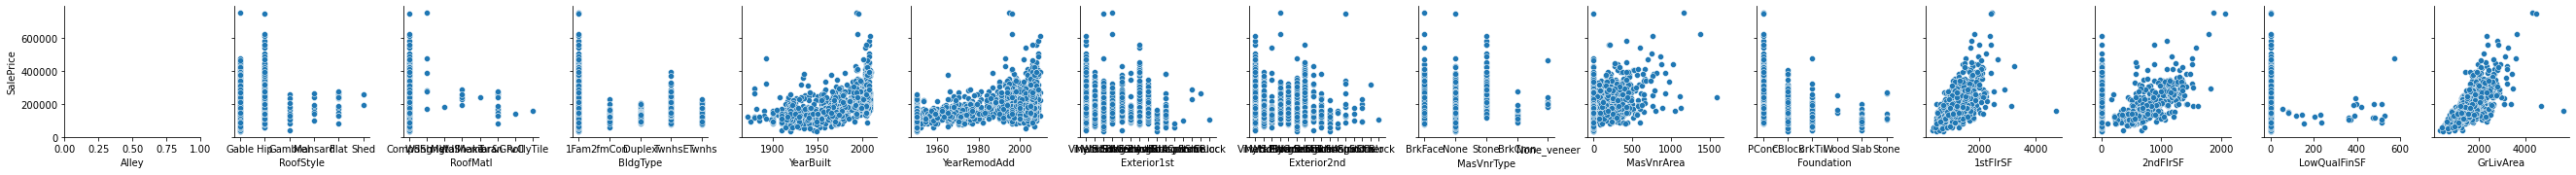

In [18]:
data_house_type = df[['Alley', 'RoofStyle', 'RoofMatl', 'BldgType',
                   'YearBuilt', 'YearRemodAdd', 'Exterior1st',
                   'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation',
                   '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea','SalePrice']]
sns.pairplot(data_house_type, y_vars=['SalePrice'], x_vars=data_house_type.columns.drop("SalePrice"),  )

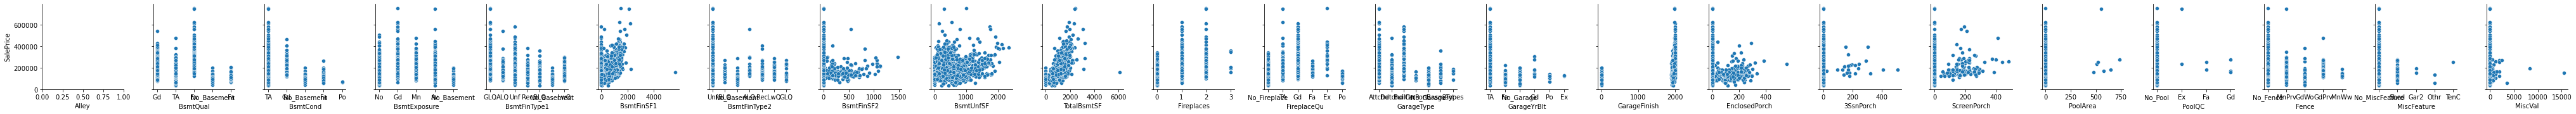

In [19]:
data_additional_extensions = df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                              'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
                              'BsmtUnfSF', 'TotalBsmtSF', 'Fireplaces',
                              'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
                              'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                              'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal','SalePrice']]
sns.pairplot(data_additional_extensions, y_vars=['SalePrice'], x_vars=data_additional_extensions.columns.drop("SalePrice"),  )

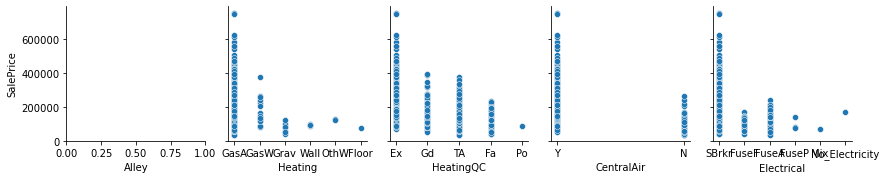

In [20]:
data_home_communications = df[['Alley','Heating', 'HeatingQC',
                            'CentralAir', 'Electrical','SalePrice']]
sns.pairplot(data_home_communications, y_vars=['SalePrice'], x_vars=data_home_communications.columns.drop("SalePrice"),  )

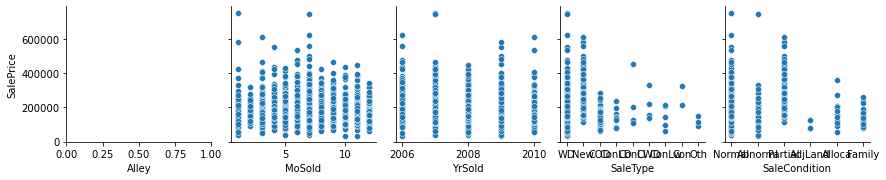

In [21]:
data_realtor_data = df[['Alley', 'MoSold', 'YrSold',
                     'SaleType', 'SaleCondition','SalePrice']]
sns.pairplot(data_realtor_data, y_vars=['SalePrice'], x_vars=data_realtor_data.columns.drop("SalePrice"),  )

### Определён метод, заменяющий значения даты постройки дома на его возраст, затем полученные признаки были разбиты на столбцы

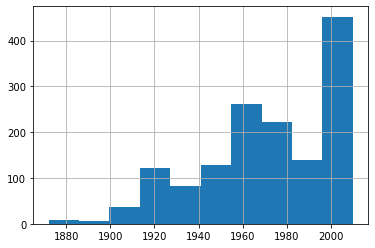

In [22]:
df['YearBuilt'].hist();

In [87]:
def change_col_year(df):
    df_year = pd.DataFrame(df['YearBuilt'].copy())
    df_year = df_year.apply(lambda i: 2021 - i)
    print(df_year)
    df_year['YearBuilt'] = np.where(df_year['YearBuilt'] > 80, 'old', 
         (np.where(df_year['YearBuilt'] > 40, 'middleAge', 'young')))
    return df_year

In [88]:
df_ext['YearBuilt'] = change_col_year(df_ext)

      YearBuilt
0            18
1            45
2            20
3           106
4            21
...         ...
1455         22
1456         43
1457         80
1458         71
1459         56

[1460 rows x 1 columns]


In [89]:
df_ext['YearBuilt']

0           young
1       middleAge
2           young
3             old
4           young
          ...    
1455        young
1456    middleAge
1457    middleAge
1458    middleAge
1459    middleAge
Name: YearBuilt, Length: 1460, dtype: object

In [90]:
 features = ['OverallQual', 
            'LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'TotalBsmtSF', 'MoSold', 'YrSold', 'SalePrice']

In [91]:
df_finall = df_ext[features]

In [92]:
df_finall = pd.concat(
    [df_finall.drop('YearBuilt', axis=1),
     pd.get_dummies(df_finall['YearBuilt'], prefix='Age')],
    axis=1)


In [93]:
df_finall

,OverallQual,LotFrontage,LotArea,GrLivArea,TotalBsmtSF,MoSold,YrSold,SalePrice,Age_middleAge,Age_old,Age_young
0,7,65.0,8450,1710,856,2,2008,208500,0,0,1
1,6,80.0,9600,1262,1262,5,2007,181500,1,0,0
2,7,68.0,11250,1786,920,9,2008,223500,0,0,1
3,7,60.0,9550,1717,756,2,2006,140000,0,1,0
4,8,84.0,14260,2198,1145,12,2008,250000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,62.0,7917,1647,953,8,2007,175000,0,0,1
1456,6,85.0,13175,2073,1542,2,2010,210000,1,0,0
1457,7,66.0,9042,2340,1152,5,2010,266500,1,0,0
1458,5,68.0,9717,1078,1078,4,2010,142125,1,0,0


## Разбиваем на train, test значения из таблицы с выбранными значениями вручную

In [94]:
# конвертируем в numpy

x, y = df_finall.drop(['SalePrice'], axis=1).to_numpy(), df_finall['SalePrice'].to_numpy()
x.shape, y.shape

((1460, 10), (1460,))

In [95]:
# разбиваем на трейн/тест выборки

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1022, 10), (438, 10), (1022,), (438,))

In [96]:
# нормируем данные

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_valid_norm = scaler.transform(x_valid)
x_train_norm

array([[ 0.64395218,  0.64175202,  0.11903379, ...,  1.19964195,
        -0.46080027, -0.84203925],
       [ 0.64395218, -0.00921708,  0.35513676, ..., -0.83358205,
        -0.46080027,  1.18759309],
       [-0.83165125,  0.42403721, -0.16919581, ...,  1.19964195,
        -0.46080027, -0.84203925],
       ...,
       [-0.09384953, -0.44682203, -0.36179604, ..., -0.83358205,
         2.1701376 , -0.84203925],
       [-0.09384953, -2.14499755, -0.86025694, ...,  1.19964195,
        -0.46080027, -0.84203925],
       [-2.30725469,  2.16575569,  0.70354196, ..., -0.83358205,
         2.1701376 , -0.84203925]])

### Обучаем различные модели по отдельности

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression()
reg.fit(x_train_norm, y_train)

# качество модели
print(f'''
    STD:
    train {y_train.std() :.2f}
    test {y_valid.std() :.2f}


    RMSE:
    train {mean_squared_error(reg.predict(x_train_norm), y_train)**.5 :.2f}
    test {mean_squared_error(reg.predict(x_valid_norm), y_valid)**.5 :.2f}

    R2:
    train {r2_score(reg.predict(x_train_norm), y_train) :.2f}
    test {r2_score(reg.predict(x_valid_norm), y_valid) :.2f}

''')



    STD:
    train 77127.66
    test 84500.31


    RMSE:
    train 40164.85
    test 35981.15

    R2:
    train 0.66
    test 0.74




In [98]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

param_grid_dtr = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'max_depth': [2, 3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': [0.5, 'sqrt', None]
}

dtr_grid = GridSearchCV(
    estimator=dtr,
    param_grid=param_grid_dtr,
    scoring='neg_mean_squared_error', 
    cv=5,
    verbose=0,
)
dtr_grid.fit(x_train_norm, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [2, 3, 5, 10, 20, None],
                         'max_features': [0.5, 'sqrt', None],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [99]:
dtr_grid.best_score_, list(dtr_grid.best_params_)

(-1727830903.7363758,
 ['criterion', 'max_depth', 'max_features', 'min_samples_split'])

In [100]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [10, 11, 5, 9, 2],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

knr_grid = GridSearchCV(
    estimator=knr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5, 
    verbose=0,  
)
knr_grid.fit(x_train_norm, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [10, 11, 5, 9, 2], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [101]:
knr_grid.best_score_, knr_grid.best_params_

(-1374396586.609222,
 {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'distance'})

In [102]:
from sklearn.linear_model import Lasso

lasso = Lasso()

param_grid = {
    'alpha': [1, 0.2, 0.04, 50, 1000, 0.0559634, 0.00060606060, 0.007031994],
    'fit_intercept': ['True', 'False'],
    'warm_start' : ['True', 'False'],
    'selection' : ['cyclic', 'random']
}

lasso_grid = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=0,
)
lasso_grid.fit(x_train, y_train);

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 571086547385.6669, tolerance: 500957997.6730415
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 687921793576.1299, tolerance: 496518222.4047091
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 531417043696.30774, tolerance: 438415820.93462247
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 717210178423.6439, tolerance: 493759218.26547503
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 570649407700.6478, tolerance: 500957997.6730415
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 684159709990.752, tolerance: 496518222.4047091
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: O

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 692323928048.6067, tolerance: 496518222.4047091
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 558068054128.8362, tolerance: 438415820.93462247
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 623789797767.4492, tolerance: 502005011.0773056
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 717537507816.4127, tolerance: 493759218.26547503
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 569281220222.9631, tolerance: 500957997.6730415
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 685521780289.4916, tolerance: 496518222.4047091
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: 

In [103]:
lasso_grid.best_score_, lasso_grid.best_params_

(-1762822339.3990269,
 {'alpha': 50,
  'fit_intercept': 'True',
  'selection': 'random',
  'warm_start': 'True'})

In [104]:
from sklearn.linear_model import Ridge
rigle = Ridge()

param_grid = {
    'alpha': [1, 0.2, 0.04, 50, 1000, 0.0559634, 0.00060606060, 0.007031994],
    'fit_intercept': ['True', 'False'],
    'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

rigle_grid = GridSearchCV(
    estimator=rigle,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=0, 

)
rigle_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.2, 0.04, 50, 1000, 0.0559634,
                                   0.0006060606, 0.007031994],
                         'fit_intercept': ['True', 'False'],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='neg_mean_squared_error')

In [105]:
rigle_grid.best_score_, rigle_grid.best_params_

(-1762970557.7163475, {'alpha': 1, 'fit_intercept': 'True', 'solver': 'svd'})

In [106]:
list_model = [dtr_grid, knr_grid, lasso_grid, rigle_grid]
best_score_list = [-x.best_score_ for x in list_model]
best_score = pd.DataFrame(best_score_list, index=['DTR', 'KNR', 'Lasso', 'Ridgle'])    
best_score.rename(index={0: "best_score"})

,0
DTR,1.727831e+09
KNR,1.374397e+09
Lasso,1.762822e+09
Ridgle,1.762971e+09


## Полученные best_scores подставляются в параметры объектов классов, происходит обучение моделей

In [107]:
lr = LinearRegression()
dt = DecisionTreeRegressor(criterion='mae', max_depth=5,
                           max_features=0.5,
                           min_samples_split=5)
knr = KNeighborsRegressor(
    algorithm='auto', n_neighbors=9, p=2, weights='distance')
lasso = Lasso(alpha=50, fit_intercept=True,
              selection='random', warm_start=False)
rigle = Ridge(alpha=1, fit_intercept='True', solver='svd')

In [108]:
lr.fit(x_train_norm, y_train)
dt.fit(x_train_norm, y_train)
knr.fit(x_train_norm, y_train)
lasso.fit(x_train_norm, y_train)
rigle.fit(x_train_norm, y_train)

Ridge(alpha=1, fit_intercept='True', solver='svd')

In [109]:
y_pred_lr = lr.predict(x_valid_norm)
y_pred_dt = dt.predict(x_valid_norm)
y_pred_knr = knr.predict(x_valid_norm)
y_pred_lasso = lasso.predict(x_valid_norm)
y_pred_rigle = rigle.predict(x_valid_norm)

In [110]:
print(f'MSE')
print(f'Linear_Regression : {mean_squared_error(y_valid, y_pred_lr)**0.5}')
print(f'Decision_tree : {mean_squared_error(y_valid, y_pred_dt)**0.5}')
print(f'KNeighborsRegressor : {mean_squared_error(y_valid, y_pred_knr)**0.5}')
print(f'Lasso : {mean_squared_error(y_valid, y_pred_lasso)**0.5}')
print(f'Ridgle : {mean_squared_error(y_valid, y_pred_rigle)**0.5}')


MSE
Linear_Regression : 35981.14782045349
Decision_tree : 40554.04369209378
KNeighborsRegressor : 37251.963077621025
Lasso : 36170.852271140786
Ridgle : 36176.46682176308


In [111]:
print(f'R2_score')
print(f'Linear_Regression : {r2_score(y_pred_lr, y_valid) :.2f}')
print(f'Decision_tree : {r2_score(y_pred_dt, y_valid) :.2f}')
print(f'KNeighborsRegressor : {r2_score(y_pred_knr, y_valid) :.2f}')
print(f'Lasso : {r2_score(y_pred_lasso, y_valid) :.2f}')
print(f'Ridgle : {r2_score(y_pred_rigle, y_valid) :.2f}')


R2_score
Linear_Regression : 0.74
Decision_tree : 0.61
KNeighborsRegressor : 0.65
Lasso : 0.71
Ridgle : 0.71


In [139]:
from sklearn.ensemble import StackingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

stacked_model = StackingRegressor(estimators=[('lasso', Lasso(alpha=50,
               fit_intercept=True, selection='random', warm_start=False)),
                                                ('rigle', Ridge(alpha = 1, fit_intercept = 'True', solver = 'svd')),
                                                ('knn', KNeighborsRegressor(
                                                    algorithm = 'auto', n_neighbors = 9, p = 2, weights = 'distance')),
                                                ('svr', SVR())], final_estimator = RandomForestRegressor(n_estimators=300))
stacked_model.fit(x_train_norm, y_train)
y_pred_sm=stacked_model.predict(x_valid_norm)

print(f'Stacked_model MSE: {mean_squared_error(y_valid,y_pred_sm)**.5 :.2f}')
print(f'Stacked_model R2_score : {r2_score(y_valid,y_pred_sm) :.2f}')

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13117166116.379211, tolerance: 607954694.1504303
  model = cd_fast.enet_coordinate_descent(


Stacked_model MSE: 26718.50
Stacked_model R2_score : 0.90


In [113]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

In [114]:
cat.fit(x_train_norm,y_train,verbose=False, plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [115]:
from catboost import Pool, cv
params = {"iterations": 100,
          "depth": 2,
          "loss_function": "RMSE",
          "verbose": False}
cv_dataset = Pool(data=x_train_norm,
                  label=y_train)
scores = cv(cv_dataset,
            params,
            fold_count=2, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [116]:
y_pred_sm_cat=cat.predict(x_valid_norm)

In [117]:
print(f'CatMSE: {mean_squared_error(y_valid,y_pred_sm_cat)**0.5}')
print(f'CatMSE: {r2_score(y_valid,y_pred_sm_cat)**0.5}')


CatMSE: 34784.82408284562
CatMSE: 0.9113405745204701


### Добавление возраста дома в "чистый" dataframe

In [118]:
df_ext = pd.concat(
    [df_ext.drop('YearBuilt', axis=1),
     pd.get_dummies(df_ext['YearBuilt'], prefix='Age')],
    axis=1)


In [119]:
df_ext

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age_middleAge,Age_old,Age_young
0,1,60,65.0,8450,7,5,2003,196.0,706,0,...,1,0,0,0,0,1,0,0,0,1
1,2,20,80.0,9600,6,8,1976,0.0,978,0,...,1,0,0,0,0,1,0,1,0,0
2,3,60,68.0,11250,7,5,2002,162.0,486,0,...,1,0,0,0,0,1,0,0,0,1
3,4,70,60.0,9550,7,5,1970,0.0,216,0,...,1,1,0,0,0,0,0,0,1,0
4,5,60,84.0,14260,8,5,2000,350.0,655,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,2000,0.0,0,0,...,1,0,0,0,0,1,0,0,0,1
1456,1457,20,85.0,13175,6,6,1988,119.0,790,163,...,1,0,0,0,0,1,0,1,0,0
1457,1458,70,66.0,9042,7,9,2006,0.0,275,0,...,1,0,0,0,0,1,0,1,0,0
1458,1459,20,68.0,9717,5,6,1996,0.0,49,1029,...,1,0,0,0,0,1,0,1,0,0


### Нормализация всех колонок в чистом DataFrame

In [121]:
# конвертируем в numpy
x, y = df_ext.drop(['Id', "SalePrice"], axis=1).to_numpy(), df_finall['SalePrice'].to_numpy()
x.shape, y.shape

((1460, 300), (1460,))

In [122]:
# разбиваем на трейн/тест выборки
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1022, 300), (438, 300), (1022,), (438,))

In [140]:
# нормируем данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_valid_norm = scaler.transform(x_valid)

In [141]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [142]:
X_ = pca.fit_transform(x_train_norm)
X_2 = pca.fit_transform(x_valid_norm)
X_.shape

(1022, 2)

In [143]:
principalDf = pd.DataFrame(data = X_ , 
                columns = ['attribute 1', 'attribute 2'])
principalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   attribute 1  1022 non-null   float64
 1   attribute 2  1022 non-null   float64
dtypes: float64(2)
memory usage: 16.1 KB


In [144]:
finalDf = pd.concat([principalDf, pd.DataFrame(y_train, columns=['SalePrice'])], axis = 1)

In [145]:
finalDf

,attribute 1,attribute 2,SalePrice
0,-0.164175,-4.622573,82500
1,3.494482,-2.302542,277000
2,-2.926845,-1.939827,126500
3,-1.965279,1.121873,239000
4,-6.238888,0.901779,76500
...,...,...,...
1017,-0.302126,-3.591405,165000
1018,-3.145616,-4.745502,128000
1019,-4.621121,4.394694,127000
1020,-3.522766,-0.398867,89500


In [150]:
from sklearn.ensemble import StackingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

stacked_model = StackingRegressor(estimators=[('lasso', Lasso(alpha=50,
               fit_intercept=True, selection='random', warm_start=False)),
                                                ('rigle', Ridge(alpha = 1, fit_intercept = 'True', solver = 'svd')),
                                                ('knn', KNeighborsRegressor(
                                                    algorithm = 'auto', n_neighbors = 9, p = 2, weights = 'distance')),
                                                ('svr', SVR())], final_estimator = RandomForestRegressor(n_estimators=300))
stacked_model.fit(x_train_norm, y_train)
y_pred_sm=stacked_model.predict(x_valid_norm)


print(f'Stacked_model MSE: {mean_squared_error(y_valid, y_pred_sm)**.5 :.2f}')
print(f'Stacked_model R2_score : {r2_score(y_valid, y_pred_sm) :.2f}')

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16550937957.801483, tolerance: 502005011.0773056
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1758227706.4754028, tolerance: 493759218.26547503
  model = cd_fast.enet_coordinate_descent(


Stacked_model MSE: 26664.32
Stacked_model R2_score : 0.90


# Планы работы 
Вывести ошибки в один dataframe, чтобы сравнить модели
Вывести общий график ошибок
